<a href="https://colab.research.google.com/github/bcataldo3/plantilla_curso_python/blob/main/docs/Clase_08 - Reduccion Dimensionalidad y APC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reduccion de Dimensionalidad y Analisis de Componentes Principales
## Introducción

### Maldición de la Dimensionalidad
La dimensión se refiere al número de características o variables que describen un objeto o un conjunto de datos. Por ejemplo, si tienes datos que incluyen la altura, peso, edad y salario de las personas, estás trabajando en un espacio de cuatro dimensiones.

La maldición de la dimensionalidad se vuelve problemática cuando el número de dimensiones aumenta. A medida que añadimos más variables para describir los datos, el espacio de búsqueda se vuelve enormemente grande. En términos sencillos, podemos pensar en ello como si estuviéramos dispersando nuestros datos en un espacio de muchas dimensiones, y esto tiene algunas consecuencias negativas. Algunos aspectos a considerar relevantes en el manejo de data con alta dimensionalidad pueden ser.

* Densidad de datos: A medida que la dimensión aumenta, la cantidad de datos necesarios para llenar ese espacio de manera significativa también debe aumentar exponencialmente. En un espacio de muchas dimensiones, los datos se vuelven más dispersos, y puede ser difícil tener suficientes datos para hacer afirmaciones precisas o tomar decisiones confiables.

* Sobreajuste: En un espacio de alta dimensionalidad, los modelos pueden volverse más susceptibles al sobreajuste. El sobreajuste ocurre cuando un modelo se ajusta demasiado a los datos de entrenamiento y no generaliza bien a nuevos datos. Con muchas dimensiones, el modelo puede encontrar patrones que son específicos de los datos de entrenamiento pero que no se aplican de manera efectiva a nuevos datos.

* Requerimientos computacionales: El procesamiento de datos en espacios de alta dimensionalidad puede ser intensivo en términos computacionales. Muchos métodos y algoritmos se vuelven más complicados y lentos a medida que aumenta la dimensión, lo que puede hacer que el análisis de datos sea más desafiante y costoso.

Para abordar estos desafíos, a menudo se recurre a técnicas como la reducción de dimensionalidad o la selección de características, que buscan preservar la información esencial mientras reducen la complejidad del espacio de características.

### Análisis de Componentes Principales
El Análisis de Componentes Principales (PCA, por sus siglas en inglés) es una técnica utilizada en estadística y análisis de datos para simplificar la complejidad en conjuntos de datos de alta dimensión, conservando al mismo tiempo la mayor cantidad posible de información. En términos simples, PCA reduce la dimensionalidad de un conjunto de datos, lo que significa que toma un conjunto de variables (o características) y lo transforma en un nuevo conjunto de variables, llamadas componentes principales. Estos componentes principales son combinaciones lineales de las variables originales.

El objetivo principal de PCA es eliminar la redundancia y la correlación entre las variables originales, lo que ayuda a destacar patrones y estructuras subyacentes en los datos. Esto es útil en casos donde hay muchas variables y se busca simplificar la interpretación de los datos y resaltar las características más importantes, reduciendo la dimensionalidad y manteniendo la mayor cantidad posible de información relevante.

<img src="https://drive.google.com/uc?export=view&id=1JGtw4GXaSUQY_ZLijNz-yC93ZTMcKZN0" width = "800" align="center"/>

En la imagen se muestra un grafico en tres dimensiones con una tendencia de los datos que, a través del que llamaremos el primer componente principal (o primer vector del PCA), puede captar gran cantidad de la información o tendencia que muestran los datos. Más adelante veremos que podremos ir agregando más componentes (vectores) para ir recogiendo más información de la data hasta llegar un punto en que, agregar más vectores no entregará mayor información para explicar la información original.

## Fundamentos Matemáticos

Una de las formas más comunes de reducir la dimensionalidad de un conjunto de datos se basa en el análisis de la matriz de covarianza de la muestra. En general, sabemos que el contenido de información de una variable aleatoria es proporcional a su varianza. Por ejemplo, dado un gaussiano multivariado, la entropía, que es la expresión matemática que empleamos para medir la información, es la siguiente:

$H=\frac{1}{2}\log(\det(2\pi e \sum))$

En la fórmula anterior, $Σ$ es la matriz de covarianza. Si asumimos (sin pérdida de generalidad) que $Σ$ es diagonal, es fácil entender que la entropía es mayor (proporcionalmente) que la varianza de cada componente individual, $σ_i^2$. Esto no es sorprendente, porque una variable aleatoria con una baja varianza está concentrada alrededor de la media y la probabilidad de sorpresas es baja. Por otro lado, cuando $σ^2$ se hace más grande, los posibles resultados aumentan junto con la incertidumbre, que es directamente proporcional a la cantidad de información.

Por supuesto, la influencia de los componentes es generalmente diferente; por lo tanto, el objetivo del Análisis de Componentes Principales es encontrar una transformación lineal de las muestras que pueda proyectarlas en un subespacio de menor dimensión, para así preservar la mayor cantidad posible de la varianza inicial. En la práctica, consideremos un conjunto de datos, $X ∈ ℝ^{m × n}$.

$X = \{\bar{x}_1,\bar{x}_2,...,\bar{x}_m\} \text{ where }\bar{x}_i \in \Re^n$

La transformación lineal que queremos encontrar es un nuevo conjunto de datos, como sigue.

$Z = \{\bar{z}_1,\bar{z}_2,...,\bar{z}_n\} \text{ where }\bar{z}_i = A^T\bar{x}_i$

Después de aplicar dicha transformación, esperamos tener lo siguiente.

$\begin{array}{ll}
      dim(\bar{z}_i) < (\ll) \: dim(\bar{x}_i) \:\: \forall \: i\\
      H(z) \thickapprox H(x)\\
\end{array} $

Comencemos considerando la matriz de covarianza de la muestra (para nuestros propósitos, también podemos emplear una estimación sesgada); para simplificar, también asumiremos que X tiene una media cero:

$\sum_{s}=\frac{1}{m}X^T X \: \in \: \Re^{n \times n}$

Una matriz de este tipo es simétrica y semidefinida positiva (no importa si no está familiarizado/a con estos conceptos, pero son muy importantes para justificar los pasos siguientes), por lo que sus vectores propios constituyen una base ortonormal. Como resumen rápido, si A es una matriz cuadrada, un vector vi se llama vector propio asociado al eigenvalor λi si se cumple lo siguiente:

$A\bar{x}_i=\lambda_i\bar{x}_i$

En otras palabras, un vector propio se transforma en una versión expandida o contraída de sí mismo (no pueden ocurrir rotaciones). No es difícil (aunque se omitirán todos los detalles matemáticos) demostrar que los vectores propios de la matriz de covarianza definen las direcciones de los componentes de covarianza (es decir, las direcciones donde el conjunto de datos tiene un componente de covarianza específico). La razón es, sin embargo, bastante simple; de hecho, después de la transformación, la nueva matriz de covarianza (del conjunto de datos transformado, Z) no tiene correlación (es decir, es diagonal) porque los nuevos ejes están alineados con los componentes de covarianza.
Esto implica que un versor (por ejemplo, $v_0 = (1, 0, 0, ..., 0)$) se transforma en $σ_i²v_i$, por lo que es un vector propio cuyo eigenvalor asociado es proporcional a la varianza del $i$-ésimo componente.
Por lo tanto, para determinar qué elementos pueden descartarse, podemos ordenar los valores propios de manera que se cumpla lo siguiente:

$\lambda_1 \leqslant \lambda_2 \leqslant \dotsc \leqslant \lambda_n $

Los vectores propios correspondientes ($v_1, v_2, \dotsc, v_n$) determinan, respectivamente, el componente correspondiente a la mayor varianza, y así sucesivamente hasta el último. Formalmente, definimos a estos vectores propios como componentes principales; por lo tanto, el primer componente principal es la dirección asociada con la mayor varianza, el segundo componente principal es ortogonal al primero y está asociado con la segunda mayor varianza, y así sucesivamente. Este concepto se muestra en la siguiente captura de pantalla, en el caso de un conjunto de datos bidimensional. En este punto, el problema está casi resuelto; de hecho, si solo seleccionamos los primeros k componentes principales ($v_i ∈ ℝ^{n × 1}), podemos construir una matriz de transformación, $A_k ∈ ℝ^{n × k}$, de manera que los vectores propios asociados a los primeros k valores propios sean filas de esta matriz:

(REVISAR MATRIZ ESTA MALA)

$A=\begin{pmatrix}
\bar{v}_1^{(1)} & \dotsb & \bar{v}_k^{(1)}\\
\vdots & \ddots & \vdots\\
\bar{v}_n^{(1)} & \dotsb & \bar{v}_k^{(1)}
\end{pmatrix}$

Por lo tanto, podemos transformar todo el conjunto de datos utilizando la siguiente multiplicación de matrices:

$z=X A_k  \text{ where } Z \in \Re^{m \times k}$

El nuevo conjunto de datos, $Z$, tiene una dimensionalidad igual a $k < (o <<) n$, y contiene una cantidad de la varianza original proporcional al número de componentes. Por ejemplo, considerando el ejemplo mostrado en la captura de pantalla anterior, si seleccionamos un solo componente, todos los vectores se transforman en puntos a lo largo del primer componente principal. Por supuesto, hay cierta pérdida de información, la cual debe ser considerada caso por caso; en las secciones siguientes, vamos a discutir cómo evaluar dicha pérdida y tomar una decisión razonable. Ahora, mostraremos brevemente cómo los componentes principales pueden ser extraídos de manera eficiente.

### PCA con SVD

Aunque vamos a utilizar implementaciones completas de PCA, será útil comprender cómo se puede llevar a cabo dicho proceso de manera eficiente. Por supuesto, la forma más obvia de proceder se basa en el cálculo de la matriz de covarianza de la muestra, su descomposición en valores propios (lo que dará como resultado los valores propios y los vectores propios correspondientes) y, finalmente, es posible construir la matriz de transformación. Este método es directo, pero desafortunadamente, también es ineficiente. La razón principal es que necesitamos calcular la matriz de covarianza de la muestra, lo cual puede ser una tarea muy larga para conjuntos de datos grandes.

Una forma mucho más eficiente la proporciona la Descomposición en Valores Singulares (SVD, por sus siglas en inglés), que es un procedimiento de álgebra lineal con algunas características importantes: puede operar directamente en el conjunto de datos, puede detenerse cuando se han extraído el número deseado de componentes y existen versiones incrementales que pueden trabajar con lotes pequeños, superando el problema de la escasez de memoria. En particular, considerando el conjunto de datos, X ∈ ℝm × n, el SVD se puede expresar de la siguiente manera:

$X=U\Lambda V^T \: \text{ where }U \in \Re^{m \times m} \text{, }\: \Lambda=diag(n \times n)\text{, } \: V \in \Re^{n \times n}$

$U$ es una matriz unitaria (es decir, $UU^T = U^TU = I$, por lo tanto, $U^T = U⁻¹$) que contiene los vectores singulares izquierdos como filas (los vectores propios de $XX^T$); $V$ (también unitaria) contiene los vectores singulares derechos como filas (correspondientes a los vectores propios de $X^TX$), mientras que $Λ$ es una matriz diagonal que contiene los valores singulares de mΣs (que son las raíces cuadradas de los valores propios tanto de $XX^T$ como de $X^TX$). Los valores propios se ordenan en orden descendente y los vectores propios se reorganizan para coincidir con las posiciones correspondientes.
Dado que el factor $1/m$ es una constante multiplicativa, no afecta la magnitud relativa de los valores propios; por lo tanto, el orden de clasificación permanece sin cambios. Por lo tanto, podemos trabajar directamente con $V$ o $U$ y seleccionar los primeros $k$ valores propios de $Λ$. En particular, podemos observar el siguiente resultado (ya que la matriz de transformación, $A$, es igual a $V$):

$Z=XA=U\Lambda V^T A = U\Lambda V^T V=U\Lambda$

Por lo tanto, al usar la versión truncada de $U_k$ (conteniendo solo los primeros $k$ vectores propios) y $Λ_k$ (conteniendo solo los primeros $k$ valores propios), podemos obtener directamente el conjunto de datos transformado de menor dimensionalidad (con $k$ componentes), de la siguiente manera:

$Z_k=U_k\Lambda_k$

Este método es rápido, efectivo y puede escalar fácilmente cuando el conjunto de datos es demasiado grande para caber en la memoria. Aunque no estemos trabajando con tales escenarios en este libro, es útil mencionar la clase ``TruncatedSVD`` de ``scikit-learn`` (que realiza SVD limitado a los $k$ primeros valores propios) y la clase ``IncrementalPCA`` (que realiza PCA en lotes pequeños). Para nuestros propósitos, emplearemos la clase estándar ``PCA`` y algunas variantes importantes, las cuales requieren que todo el conjunto de datos quepa en la memoria.


## Whitening

Una aplicación importante de la SVD es el procedimiento de blanqueamiento (whitening en ingles), que fuerza al conjunto de datos, $X$, con una media nula (es decir, $\mathbb{E}[X] = 0$ o centrada en cero), a tener una matriz de covarianza identidad, $C$ (que es real y simétrica). Este método es extremadamente útil para mejorar el rendimiento de muchos algoritmos supervisados, los cuales pueden beneficiarse de una varianza única compartida por todos los componentes. Aplicando la descomposición a $C$, obtenemos lo siguiente:

$C= \mathbb{E}[X^TX]=V\Lambda V^T = I$

Las columnas de la matriz V son los vectores propios de $C$, mientras que $Λ$ es una matriz diagonal que contiene los valores propios (recuerda que la SVD devuelve valores singulares, que son las raíces cuadradas de los valores propios). Por lo tanto, necesitamos encontrar una transformación lineal, $z = Ax$, de manera que $\mathbb{E}[ZTZ] = I$. Esto es directo al usar la descomposición previa:

$C_W=\mathbb{E}[Z^TZ]=\mathbb{E}[AX^TXA]=A \mathbb{E}[X^TX] A^T=AV\Lambda V^T A^T=I$

A partir de la ecuación anterior, podemos derivar la expresión para la matriz de transformación, A:

$A A^T = V\Lambda^{-1} V^T=I \:\: \Rightarrow A=V\Lambda^{-\frac{1}{2}}$

Ahora, mostraremos los efectos del blanqueamiento con un conjunto de datos de prueba pequeño, de la siguiente manera. La función ``whiten()``, utilizada para realizar el blanqueamiento en un conjunto de datos genérico (el centrado en cero es parte del proceso), se muestra en el siguiente fragmento de código (el parámetro ``correct`` fuerza la corrección de escala después del blanqueamiento). La matriz de covarianza antes y después se muestran a continuación


In [6]:
# Importe librerias
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs

# Establecemos una semilla para reproducibilidad
np.random.seed(1000)

# Definimos funciones para el blanqueamiento
def zero_center(X):
    return X - np.mean(X, axis=0)
def whiten(X, correct=True):
    Xc = zero_center(X)
    _, L, V = np.linalg.svd(Xc)
    W = np.dot(V.T, np.diag(1.0 / L))
    return np.dot(Xc, W) * np.sqrt(X.shape[0]) if correct else 1.0

# Creamos data artificialmente con make_blobs e imprimimos su covarianza antes y después del whitening
X, _ = make_blobs(n_samples=300, centers=1, cluster_std=2.5, random_state=1000)
print(np.cov(X.T))
Xw = whiten(X)
print(np.cov(Xw.T))


[[6.37258226 0.40799363]
 [0.40799363 6.32083501]]
[[ 1.00334448e+00 -6.53509205e-17]
 [-6.53509205e-17  1.00334448e+00]]


El resultado del blanqueamiento aplicado a la matriz $X$ se muestra en la siguiente imagen.

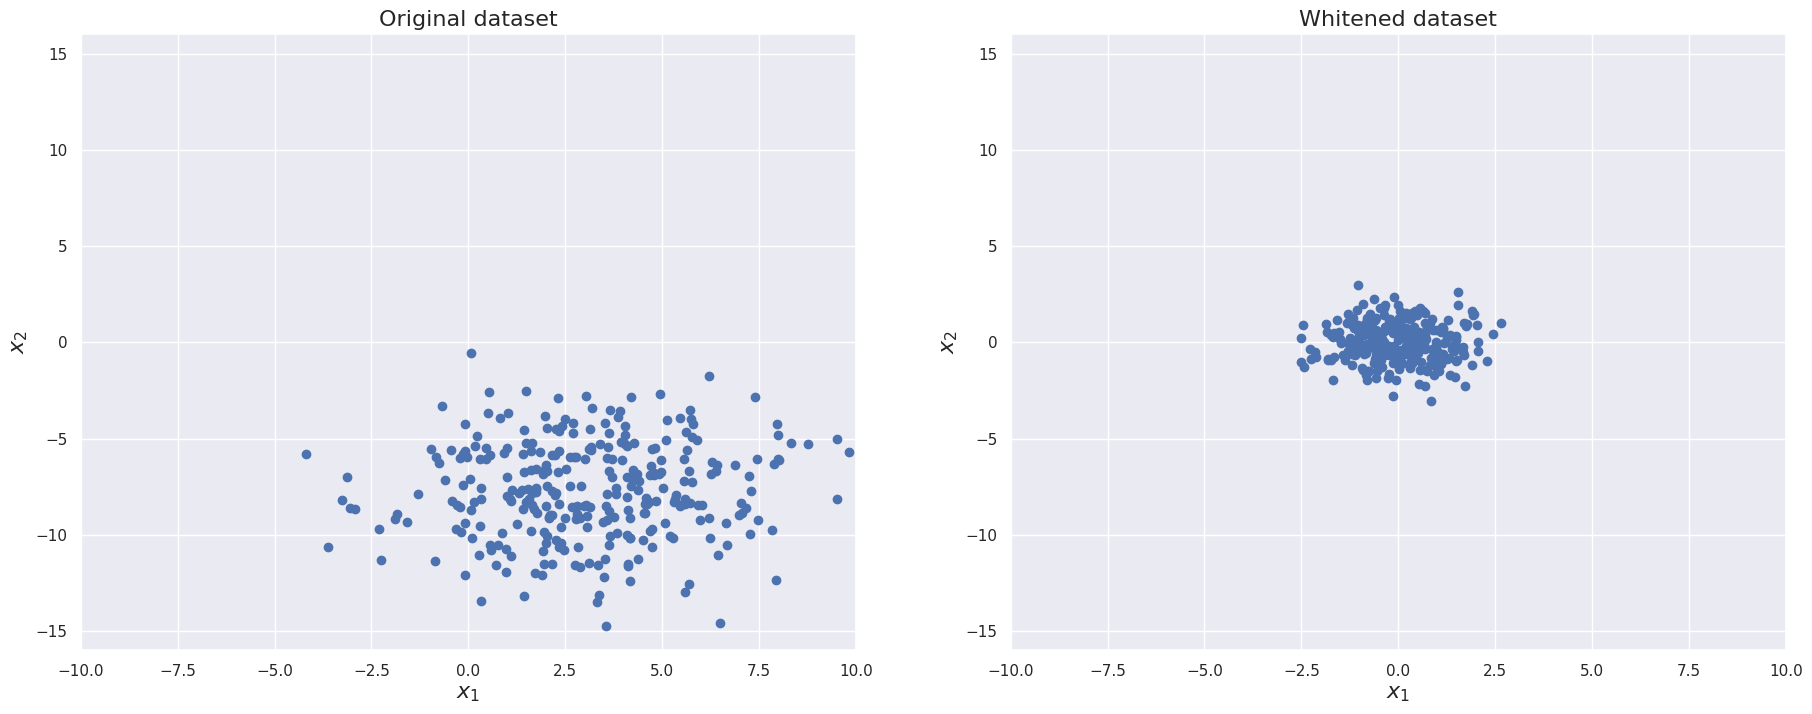

In [7]:
# Mostramos graficos de la data antes y despues del whitening
sns.set()
fig, ax = plt.subplots(1, 2, figsize=(22, 8))
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_xlim([-10, 10])
ax[0].set_ylim([-16, 16])
ax[0].set_xlabel(r'$x_1$', fontsize=16)
ax[0].set_ylabel(r'$x_2$', fontsize=16)
ax[0].set_title('Original dataset', fontsize=16)
ax[1].scatter(Xw[:, 0], Xw[:, 1])
ax[1].set_xlim([-10, 10])
ax[1].set_ylim([-16, 16])
ax[1].set_xlabel(r'$x_1$', fontsize=16)
ax[1].set_ylabel(r'$x_2$', fontsize=16)
ax[1].set_title('Whitened dataset', fontsize=16)
plt.show()